# Optically Thick HI Absorption


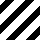
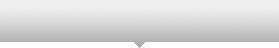
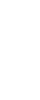
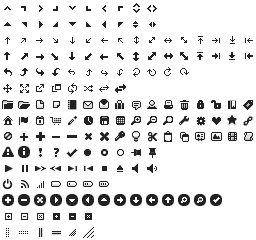
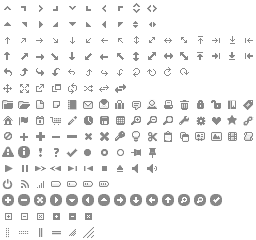
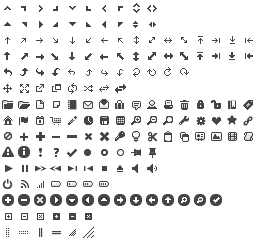
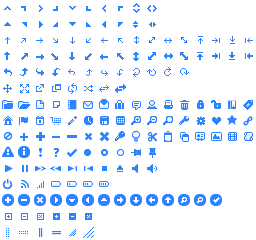
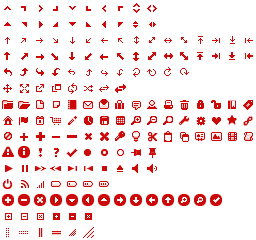
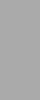
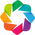
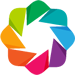
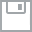
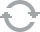
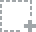
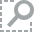
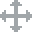
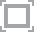
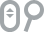

In [1]:
# imports
from astropy import constants as const
from astropy.cosmology import Planck15

from linetools.analysis.absline import photo_cross
from linetools.spectra import io as lsio

from pyigm.fN.fnmodel import FNModel
from pyigm.fN import tau_eff

from bokeh.io import output_notebook, show, hplot, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d

output_notebook()

In [12]:
# For presentation
pwdth = 600  
phght = 400
# For laptop
#pwdth = 800
#phght = 600

## Photoionization cross-section

### Exact (dipole) expression

$\sigma_{\rm photo} = \frac{2^9 \pi^2}{3} \alpha a_0^2 \left ( \frac{I_H}{h \nu} \right )^2
f(\eta)$

In [2]:
a = 1/137.036 # Fine-structure constant
bohr = 5.2917721067 * 1e-9 * u.cm
coeff = 2**9 * np.pi**2 / 3 * a * bohr**2
IH = const.Ryd.to('erg', equivalencies=u.spectral())

### $f(\eta)$

$f(\eta) = \frac{\exp [-4 \eta \, {\rm cot^{-1}}\eta]}{1 - \exp[-2 \pi \eta]}$

In [3]:
def f(eta):
    num = np.exp(-4*eta*np.arctan(1./eta))
    denom = 1 - np.exp(-2*np.pi*eta)
    #
    return num/denom

### Energy range

In [4]:
energy = IH * np.linspace(1.0002,6.,100)

### Calculate

In [5]:
eta = np.sqrt(IH/ (energy-IH))
sig_phot= coeff * (IH/energy)**4 * f(eta.value)
sig_phot[0]

<Quantity 6.3009569637783145e-18 cm2>

In [13]:
# Bokeh plot
pexact = figure(plot_width=pwdth, plot_height=phght, title="Photoionization cross-section")
# Cumul
pexact.line((energy/IH).value, sig_phot.value, color='blue', line_width=2)

# Axes
pexact.xaxis.axis_label = "Energy (Ryd)"
pexact.yaxis.axis_label = "sigma_phot (cm^2)"
#pexact.set(y_range=Range1d(0,1.1))
show(pexact)

### Power-law dependence

For $\sigma \propto \nu^{-\alpha}$,

$\frac{d \ln \sigma}{d \ln\nu} = - \alpha$

In [7]:
energy = IH * np.linspace(1.0002,20.,100)
#
eta = np.sqrt(IH/ (energy-IH))
sig_phot= coeff * (IH/energy)**4 * f(eta.value)

In [8]:
lgsig = np.log(sig_phot.value)
lge = np.log(energy.value)

In [9]:
dlnsig = lgsig - np.roll(lgsig,1)
dlnsig[0] = dlnsig[1]
#
dlne = lge - np.roll(lge,1)
dlne[0] = dlne[1]

In [40]:
# Power-law
# Bokeh plot
pplaw = figure(plot_width=600, plot_height=400, title="Power-law Dependence of sigma")
# Cumul
pplaw.line((energy/IH).value, dlnsig/dlne, color='blue', line_width=2)

# Axes
pplaw.xaxis.axis_label = "Energy (Ryd)"
pplaw.yaxis.axis_label = "dln(sigma)/dln(nu)"
#pexact.set(y_range=Range1d(0,1.1))
show(pplaw)

### Verner et al. 1996 approximation

In [42]:
verner_phot = photo_cross(1,1, energy.to('eV'))
verner_phot[0]

<Quantity 6.3357590017840465e-18 cm2>

In [43]:
# Bokeh plot
pverner = figure(plot_width=600, plot_height=400, title="Approxiate Photoionization Cross-section")
# Cumul
pverner.line((energy/IH).value, np.log10(sig_phot.value), color='blue', line_width=2)
pverner.line((energy/IH).value, np.log10(verner_phot.value), color='green', line_width=2)


# Axes
pverner.xaxis.axis_label = "Energy (Ryd)"
pverner.yaxis.axis_label = "log10 [sigma_phot (cm^2)]"
#pexact.set(y_range=Range1d(0,1.1))
show(pverner)

In [16]:
verner_phot = photo_cross(1,1, IH.to('eV'))
np.log10(1./verner_phot.value)

17.197967983411285

## Example LLS

### J0529-3526 from the XQ-100 Survey

In [44]:
# Read
j0529_uvb = lsio.readspec('Data/J0529-3526_uvb.fits')
j0529_vis = lsio.readspec('Data/J0529-3526_vis.fits')

In [45]:
# Splice
j0529 = j0529_uvb.splice(j0529_vis)

In [19]:
# Bokeh plot
pj0529 = figure(plot_width=800, plot_height=600, title="LLS in J0529-3526")
# Cumul
pj0529.line(j0529.wavelength.value, j0529.flux.value, color='black', line_width=2)


# Axes
pj0529.xaxis.axis_label = "Observed Wavelength (Ang)"
pj0529.yaxis.axis_label = "Relative Flux"
pj0529.set(x_range=Range1d(4200,7000), y_range=Range1d(0., 1.8e-16))
show(pj0529)

In [46]:
# Plot with linetools GUI
from linetools.guis import xspecgui
xspecgui.main(j0529)

button=1, x=265.000000, y=270.000000, xdata=5921.724731, ydata=3.93961e-17
button=1, x=331.000000, y=238.000000, xdata=4963.186095, ydata=1.46647e-17
button=1, x=231.000000, y=227.000000, xdata=4915.478977, ydata=1.33764e-17
button=1, x=227.000000, y=227.000000, xdata=4913.570692, ydata=1.33764e-17
button=3, x=227.000000, y=227.000000, xdata=4913.570692, ydata=1.33764e-17
You chose: HI 912d :: 912.703 Angstrom :: 5.264e-05
button=3, x=363.000000, y=138.000000, xdata=5097.744021, ydata=2.95247e-18
You chose: HI 923 :: 923.150 Angstrom :: 0.002217
You chose: HI 937 :: 937.803 Angstrom :: 0.007803
button=3, x=135.000000, y=210.000000, xdata=4916.313851, ydata=1.13853e-17
You chose: HI 912d :: 912.703 Angstrom :: 5.264e-05
button=3, x=326.000000, y=140.000000, xdata=5098.555042, ydata=3.18672e-18
You chose: HI 923 :: 923.150 Angstrom :: 0.002217
You chose: HI 949 :: 949.743 Angstrom :: 0.01395
button=3, x=352.000000, y=140.000000, xdata=4994.434257, ydata=3.18672e-18
You chose: HI 923 :: 9

## Mean free path between LLS

### $\ell(z)$ from Ribaudo+11

In [21]:
def calc_lz(z):
    lz = 1.62 * ((1+z)/(1 + 3.23))**(1.83)
    return lz

In [22]:
z=3.5
lz = calc_lz(z)
lz

1.814224562347373

### $\Delta z$ for 1 LLS on average

In [23]:
Dz1 = 1./lz
Dz1

0.5511996809844361

### Estimate corresponding proper distance

$\frac{\Delta r_p}{\Delta z} = \frac{c}{H(z) (1+z)}$

In [24]:
def calc_Drp(z,Dz):
    num = const.c.to('cm/s') * Dz
    denom = Planck15.H(z) * (1+z)
    return (num/denom).to('Mpc')

In [25]:
Drp = calc_Drp(z,Dz1)
Drp

<Quantity 100.88482244567861 Mpc>

## $dX$

In [26]:
def calc_dXdz(z):
    num = (1+z)**2 * Planck15.H0
    denom = Planck15.H(z)
    return (num/denom).value

In [27]:
zval = np.linspace(1., 5, 100)
dXdz = calc_dXdz(zval)

In [29]:
# Bokeh plot
pdX = figure(plot_width=pwdth, plot_height=phght, title="dX/dz")
# Cumul
pdX.line(zval, dXdz, color='blue', line_width=2)

# Axes
pdX.xaxis.axis_label = "z"
pdX.yaxis.axis_label = "dX/dz"
pdX.set(y_range=Range1d(0,5))#, y_range=Range1d(0., 1.8e-16))
show(pdX)

In [30]:
calc_dXdz(2.8)

3.436333906605621

## $\ell(z)$ from $f(N_{\rm HI})$ derived from Ly$\alpha$ Forest  (Kim et al. 2013)

### $f(N_{\rm HI},z)$

$ f(N_{\rm HI},z) = 10^{9.13} N_{\rm HI}^{-1.52}$

In [31]:
# simple power-law integration
lz_tau2 = 10**9.13 * 10**(17.5*(-0.52)) / 0.52
lz_tau2

2.0606140485338638

In [32]:
calc_lz(2.8) # Ribaudo+11

1.3314232116748623

----

## $\tau_{\rm eff}^{\rm LL}$

In [33]:
# Setup
zem = 3.5
z912 = 3

### $f(N_{\rm HI})$

In [34]:
fnmodel = FNModel.default_model()
fnmodel.zmnx = (0.5,4) # extend default range

Using P14 spline values to generate a default model
Loading: /Users/xavier/local/Python/pyigm/pyigm/data/fN/fN_spline_z24.fits.gz


In [35]:
# Calculate
zval, teff_LL = tau_eff.lyman_limit(fnmodel, z912, zem)

> /Users/xavier/local/Python/pyigm/pyigm/fN/tau_eff.py(119)lyman_limit()
-> teff_LL = (np.cumsum(N_summed[::-1]))[::-1] * dz
(Pdb) c


### Plot

In [37]:
# Bokeh plot
ptLL = figure(plot_width=pwdth, plot_height=phght, title="Effective Opacity")
# Cumul
ptLL.line(zval, teff_LL, color='blue', line_width=2)

# Axes
ptLL.xaxis.axis_label = "z"
ptLL.yaxis.axis_label = "teff_LL"
ptLL.set(y_range=Range1d(0,2))#, y_range=Range1d(0., 1.8e-16))
show(ptLL)

### Differential contribution with $\log N$

In [38]:
logNHI = np.linspace(12., 22, 100)
Nval = 10**logNHI
dlogN = logNHI[1]-logNHI[0]
# f(N)
log_fnX = fnmodel.evaluate(logNHI, 3.)
# Per logN
intgrnd = 10.**(log_fnX.flatten()) * 10**logNHI * (1-np.exp(-1*Nval*6.33e-18))

In [47]:
# Bokeh plot
pdtLL = figure(plot_width=600, plot_height=400, title="Differential Effective Opacity")
# Cumul
pdtLL.line(logNHI, intgrnd, color='green', line_width=2)

# Axes
pdtLL.xaxis.axis_label = "log NHI"
pdtLL.yaxis.axis_label = "d teff_LL / dlogN (Relative)"
pdtLL.set(y_range=Range1d(0,0.1))#, y_range=Range1d(0., 1.8e-16))
show(pdtLL)

## LLS Surveys

### See pyigm documentation